In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Goal
* To analyze the effect ESRB rating, review score, and year of release have on global sales.

# Content

* Alongside the fields: Name, Platform, Year_of_Release, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales, we have:-

1. Critic_score - Aggregate score compiled by Metacritic staff
2. Critic_count - The number of critics used in coming up with the Critic_score
3. User_score - Score by Metacritic's subscribers
4. User_count - Number of users who gave the user_score
5. Developer - Party responsible for creating the game
6. Rating - The ESRB ratings

# Approach

In [2]:
vgs = pd.read_csv("2016VGS.csv", na_values = "?", skipinitialspace=True)
vgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [3]:
vgs.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#List all unique platforms
vgs['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [5]:
#Create new dataframe for platforms we are interested in
vgs1 = vgs[(vgs.Platform == 'Wii') | (vgs.Platform == 'PS4') | (vgs.Platform == 'XOne')]
#Checking results
vgs1['Platform'].unique()

array(['Wii', 'PS4', 'XOne'], dtype=object)

In [6]:
#Only interested in titles with ESRB rating
vgs1 = vgs1[vgs1['Rating'].notna()]
print(vgs1.isna().sum())

Name                 0
Platform             0
Year_of_Release     25
Genre                0
Publisher            0
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
Critic_Score       459
Critic_Count       459
User_Score         462
User_Count         462
Developer            0
Rating               0
dtype: int64


In [7]:
#Convert NaN's to interpretable data
vgs1['Year_of_Release'].fillna(0, inplace = True)
vgs1['Critic_Score'].fillna(vgs1['Critic_Score'].mean(), inplace = True)
vgs1['Critic_Count'].fillna(vgs1['Critic_Count'].mean(), inplace = True)
vgs1['User_Score'].fillna(vgs1['User_Score'].mean(), inplace = True)
vgs1['User_Count'].fillna(vgs1['User_Count'].mean(), inplace = True)
print(vgs1.isna().sum())

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64


In [8]:
vgs1['Rating'].unique()

array(['E', 'T', 'M', 'E10+', 'EC'], dtype=object)

In [9]:
#Replace categorical rating with numerical value for correlation
#Higher the number =  higher age requirement to play
vgs1['Rating'].replace(['E', 'T', 'E10+', 'M', 'EC'], [3, 4, 2, 5, 1], inplace=True)

In [10]:
vgs1['Rating'].unique()

array([3, 4, 5, 2, 1], dtype=int64)

In [11]:
#Drop object columns / Extra sale columns
vgs1 = vgs1.select_dtypes(exclude=['object'])
vgs1.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], axis = 1, inplace = True)
vgs1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1443 entries, 0 to 16676
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year_of_Release  1443 non-null   float64
 1   Global_Sales     1443 non-null   float64
 2   Critic_Score     1443 non-null   float64
 3   Critic_Count     1443 non-null   float64
 4   User_Score       1443 non-null   float64
 5   User_Count       1443 non-null   float64
 6   Rating           1443 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 90.2 KB


# Data Visualization

In [12]:
vgs1['Global_Sales'].describe()

count    1443.000000
mean        0.824837
std         3.067632
min         0.010000
25%         0.090000
50%         0.230000
75%         0.640000
max        82.530000
Name: Global_Sales, dtype: float64

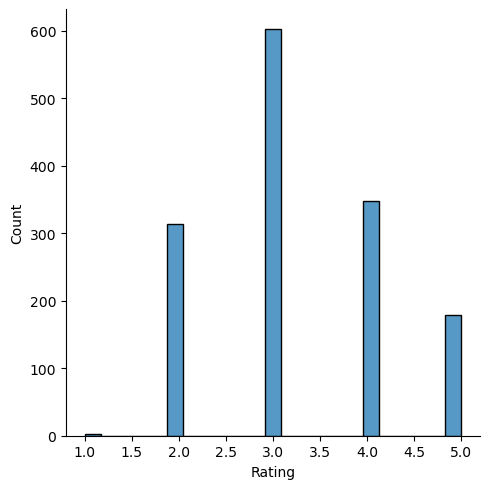

In [13]:
sns.displot(vgs1['Rating'])

<Axes: >

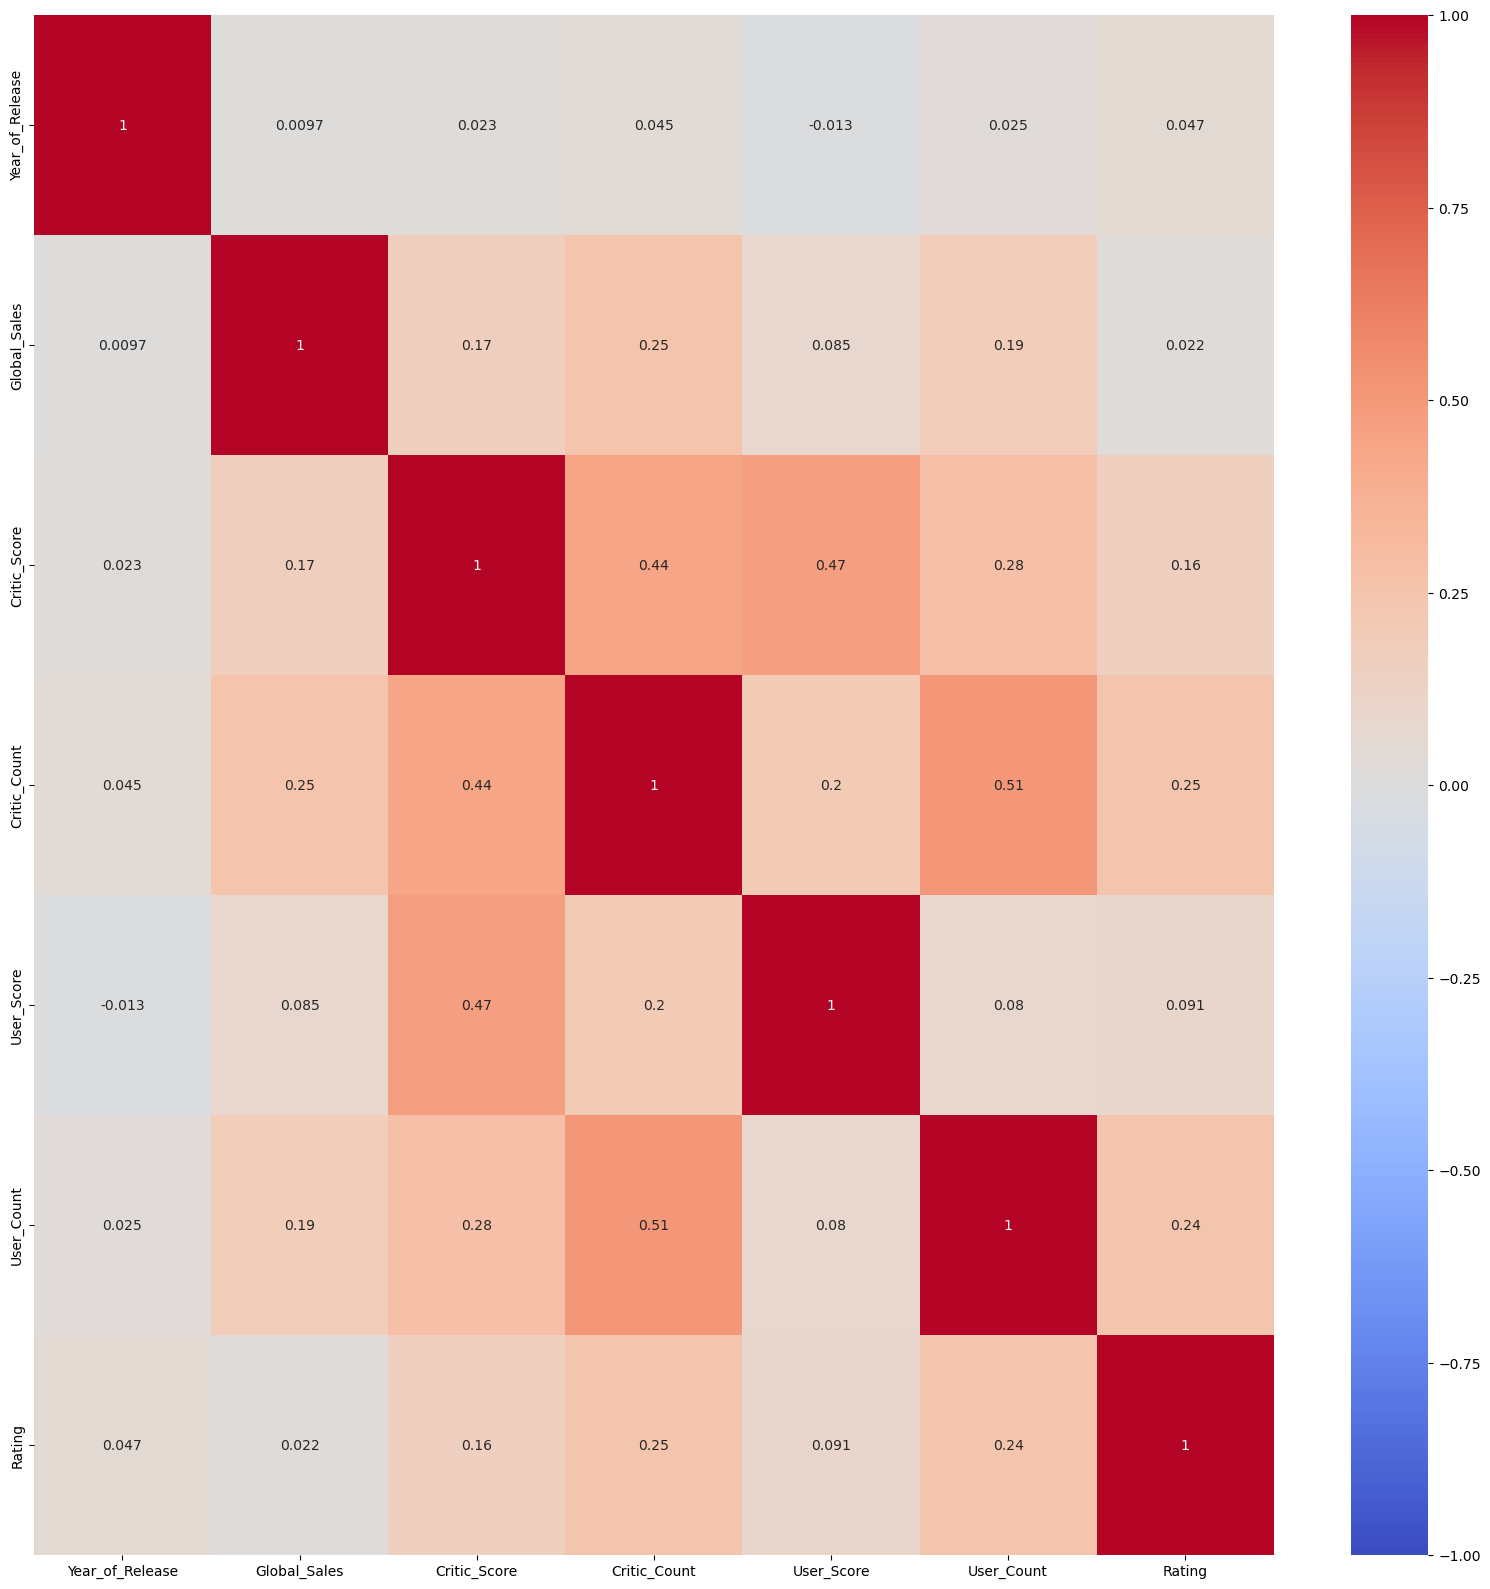

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(vgs1.corr(numeric_only = True), annot = True, cmap = 'coolwarm', vmin = -1)

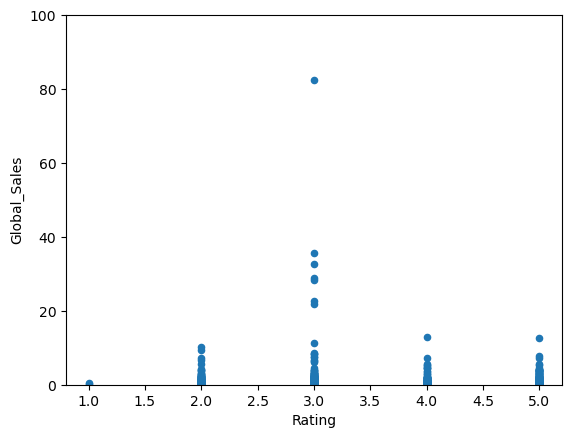

In [15]:
data = pd.concat([vgs1['Rating'], vgs1['Global_Sales']], axis=1)
data.plot.scatter(x='Rating', y='Global_Sales', ylim=(0,100));

# Observations
* Correlation between critic count and user count
* Weak correlation between rating and critic count

# Modeling

* Label Selection: Global Sales
* Feature Selection: rating, critics, users, and release date 

In [16]:
#Convert nominal data to dummy variable
vgs1 = pd.get_dummies(vgs1, columns=['Rating','Year_of_Release'], prefix= 'dummies', prefix_sep='-')
vgs1.head()

,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,dummies-1,dummies-2,dummies-3,dummies-4,dummies-5,...,dummies-2007.0,dummies-2008.0,dummies-2009.0,dummies-2010.0,dummies-2011.0,dummies-2012.0,dummies-2013.0,dummies-2014.0,dummies-2015.0,dummies-2016.0
0,82.53,76.0,51.0,8.0,322.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,35.52,82.0,73.0,8.3,709.0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,32.77,80.0,73.0,8.0,192.0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
7,28.92,58.0,41.0,6.6,129.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,28.32,87.0,80.0,8.4,594.0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [17]:
y = vgs1.Global_Sales.values
vgs1.drop(columns = ['Global_Sales'], inplace = True)
x = vgs1.values
print(x.shape)
print(y.shape)

(1443, 21)
(1443, 22)


In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.2,random_state=1)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.